<a href="https://colab.research.google.com/github/lucidCrafts/KH_Course_Exercises_Repository/blob/main/Feature_Importance_in_Random_Forest_Hands_on_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import all the relevant packages.

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import f1_score
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

In [2]:
# load the Pima Indian dataset into a data frame
pima_dataset = pd.read_csv('/content/diabetes.csv')
pima_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#divide the data into 2 sets - Training and Test sets.
X = pima_dataset.drop(['Outcome'],axis=1)

In [7]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
y = pima_dataset['Outcome'][:]

In [9]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42, stratify =y)

In [29]:
y_test.shape

(154,)

In [27]:
X_test.shape

(154, 8)

In [28]:
y_train.shape

(614,)

In [12]:
print(X_train.size, X_test.shape)

4912 (154, 8)


In [13]:
#Inspect whether the 2 sets are indeed stratified.

print(pd.Series(y_train).value_counts(normalize = True))

0    0.651466
1    0.348534
Name: Outcome, dtype: float64


In [15]:
print(pd.Series(y_test).value_counts(normalize = True))

0    0.649351
1    0.350649
Name: Outcome, dtype: float64


In [16]:
#instantiate the Random Forest model with all the hyperparameters and train the model using the training data.
# Train the model using the best parameters
rf_model = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)

In [17]:
rf_model

RandomForestClassifier(max_depth=5, random_state=42)

In [18]:
#Fit the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [37]:
## Get the probability of predicting 1 on training data
y_pred = rf_model.predict_proba(X_train)[:,1]
auc_train = roc_auc_score(y_train, y_pred)

In [38]:
# Get the probability of predicting 1 on the test data
y_pred = rf_model.predict_proba(X_test)[:,1]
auc_test = roc_auc_score(y_test, y_test)

In [39]:
print('Train Dataset ROC AUC Score:' + str(auc_train),', Test Dataset ROC AUC Score:'+str(auc_test))


Train Dataset ROC AUC Score:0.9397780373831776 , Test Dataset ROC AUC Score:1.0


<BarContainer object of 8 artists>

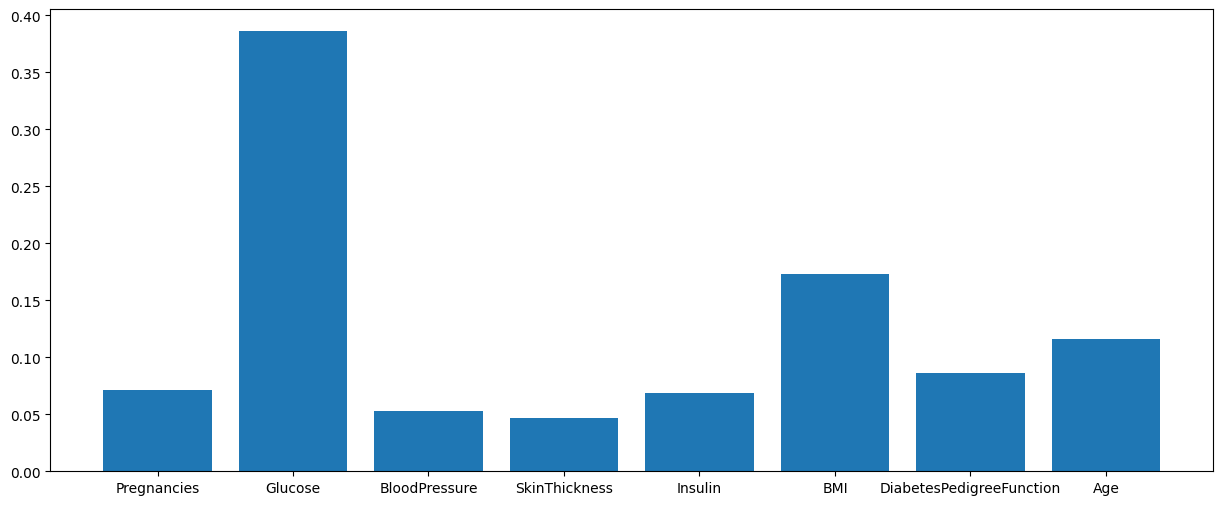

In [42]:
#Plot the feature importance of each feature calculated by the Random Forest model.
plt.figure(figsize=(15,6))
feature_importances = rf_model.feature_importances_
plt.bar(X_train.columns, feature_importances)

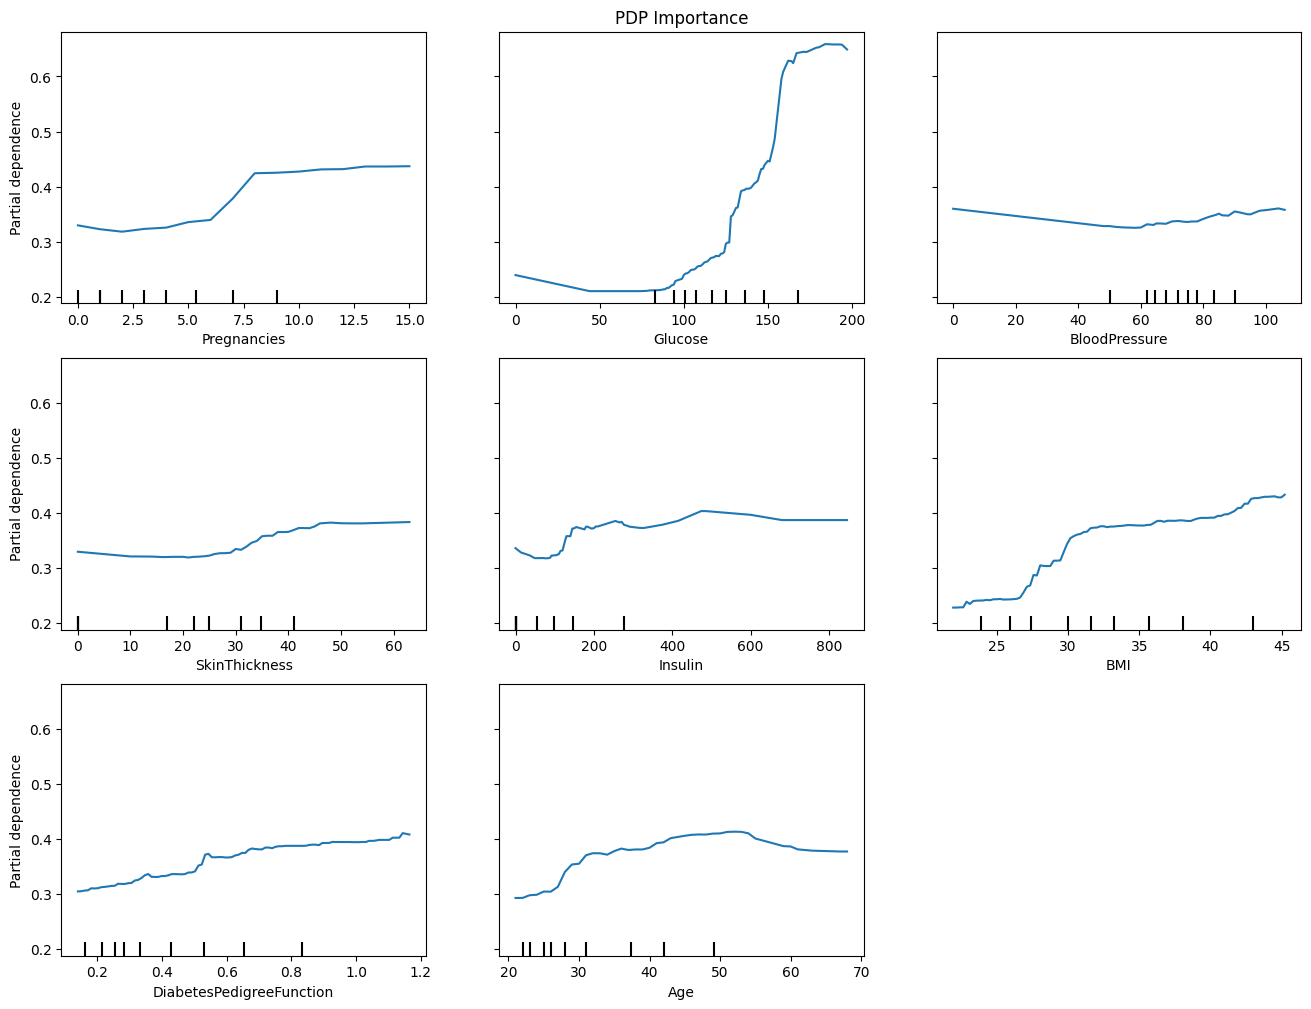

In [44]:
#use the Partial dependency method to plot the feature importance.
fig, ax =plt.subplots(figsize=(16,12))
ax.set_title("PDP Importance")
pdp_features = X_test.columns
PartialDependenceDisplay.from_estimator(rf_model, X_test, pdp_features, ax=ax);


In [52]:
#calculate the feature importance of each of the features using the trained model.

result = permutation_importance(rf_model, X_train, y_train, n_repeats=10, random_state=42)
sorted_importances_idx = result.importances_mean.argsort()

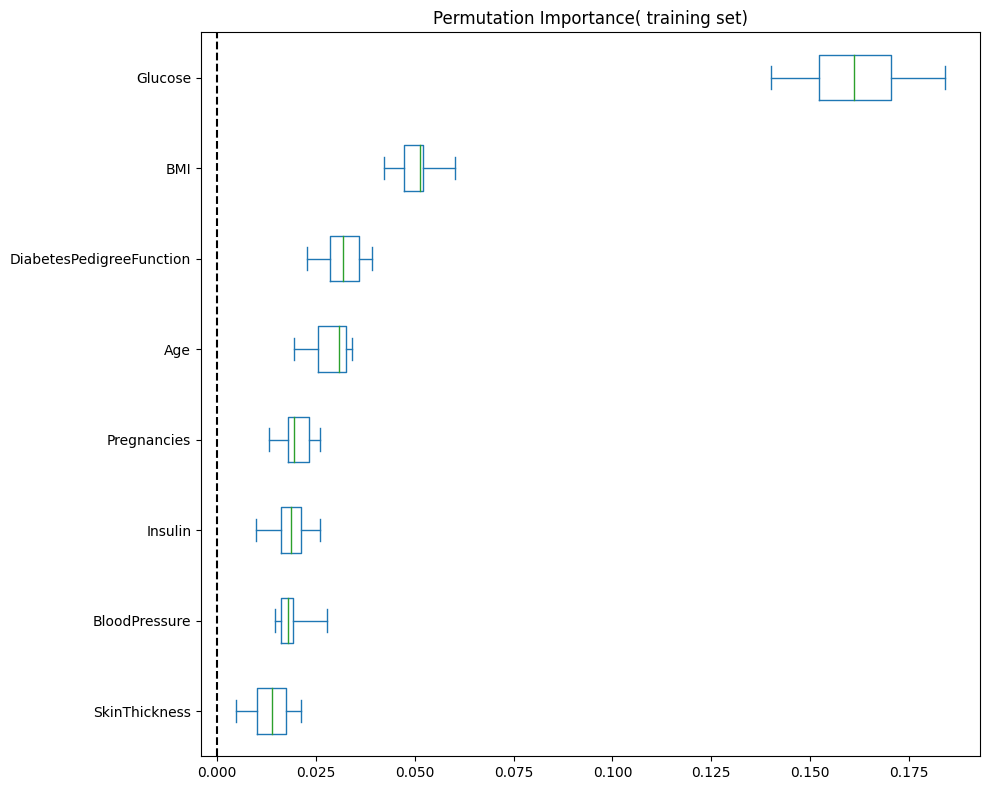

In [56]:
importances = pd.DataFrame(result.importances[sorted_importances_idx].T,
                          columns=X_train.columns[sorted_importances_idx],)
ax =importances.plot.box(vert=False, whis=10, figsize = (10,8))
ax.set_title("Permutation Importance( training set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.figure.tight_layout()